In [14]:
from qiskit import *
%matplotlib inline
import math as m
from qiskit.tools.visualization import plot_histogram

In [32]:
q= QuantumRegister(5)
n= len(q)
c= ClassicalRegister(n)
qc= QuantumCircuit(q,c)

In [33]:
#for i in range(n):
#    if i%2== 0:
#        qc.x(q[i])
#    else:
#       pass

#qc.barrier()
#qc.draw(output= 'mpl')

In [34]:
def input_stage(circuit,qr,no):
    for k in range(no):
        circuit.h(qr[k])
        circuit.u1(-m.pi/float(2**k),qr[k])
    circuit.barrier()
    
def QFT(circuit,qr,no):
    for i in range(no):
        circuit.h(qr[i])
        for j in range(i+1,no):
            circuit.cu1(m.pi/float(2**(j-i)),qr[j],qr[i])
    circuit.barrier()

In [35]:
input_stage(qc,q,n)
QFT(qc,q,n)
for i in range(n):
    qc.measure(q[i],c[i])

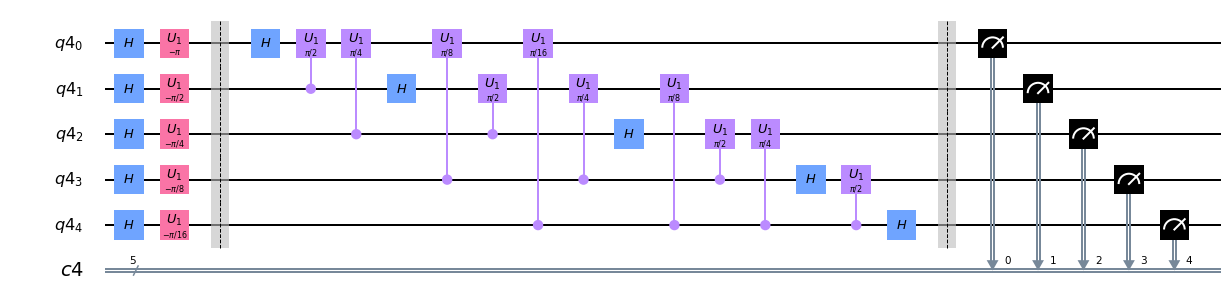

In [36]:
qc.draw(output= 'mpl')

{'00001': 1024}


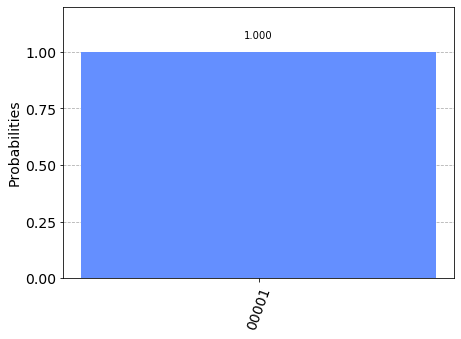

In [37]:
simulator= Aer.get_backend('qasm_simulator')
result= execute(qc,backend= simulator,shots= 1024).result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))